In [2]:
import neural_networks
import importlib
from neural_networks import MVENetwork
importlib.reload(neural_networks)
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K

2022-10-28 14:39:30.765720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 17
plt.rcParams['axes.linewidth'] = 0.2

## Simulating Data

In [4]:
X = np.random.uniform(0, 10, 1000)
Y = np.random.normal(loc=0.4 * np.sin(2*np.pi*X), scale=0.01)
n_hidden = np.array([40, 20, 20, 20, 10, 10, 10, 10])

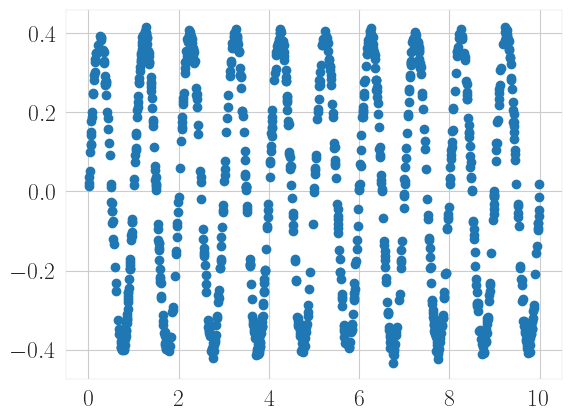

In [6]:
plt.scatter(X, Y)
plt.show()

## Simultaneously optimizing mean and variance

In [21]:
n_hidden = np.array([40, 20, 20, 20, 10, 10, 10, 10])
n_epochs = 4000

In [23]:
model_1 = MVENetwork(X=X, Y=Y, n_hidden_mean=n_hidden, n_hidden_var=n_hidden, n_epochs=n_epochs, verbose=1, warmup=0, fixed_mean=1, batch_size=1000, reg_mean=0, reg_var=0)

Train on 1000 samples
Epoch 1/4000
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.3691
Epoch 2/4000
1000/1000 [==============================] - 0s 13us/sample - loss: 1.3414
Epoch 3/4000
1000/1000 [==============================] - 0s 8us/sample - loss: 1.3247
Epoch 4/4000
1000/1000 [==============================] - 0s 8us/sample - loss: 1.3047
Epoch 5/4000
1000/1000 [==============================] - 0s 8us/sample - loss: 1.2831
Epoch 6/4000
1000/1000 [==============================] - 0s 8us/sample - loss: 1.2637
Epoch 7/4000
1000/1000 [==============================] - 0s 8us/sample - loss: 1.2467
Epoch 8/4000
1000/1000 [==============================] - 0s 17us/sample - loss: 1.2298
Epoch 9/4000
1000/1000 [==============================] - 0s 8us/sample - loss: 1.2118
Epoch 10/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 1.1932
Epoch 11/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 1.1747
Epoch 12/4000
100

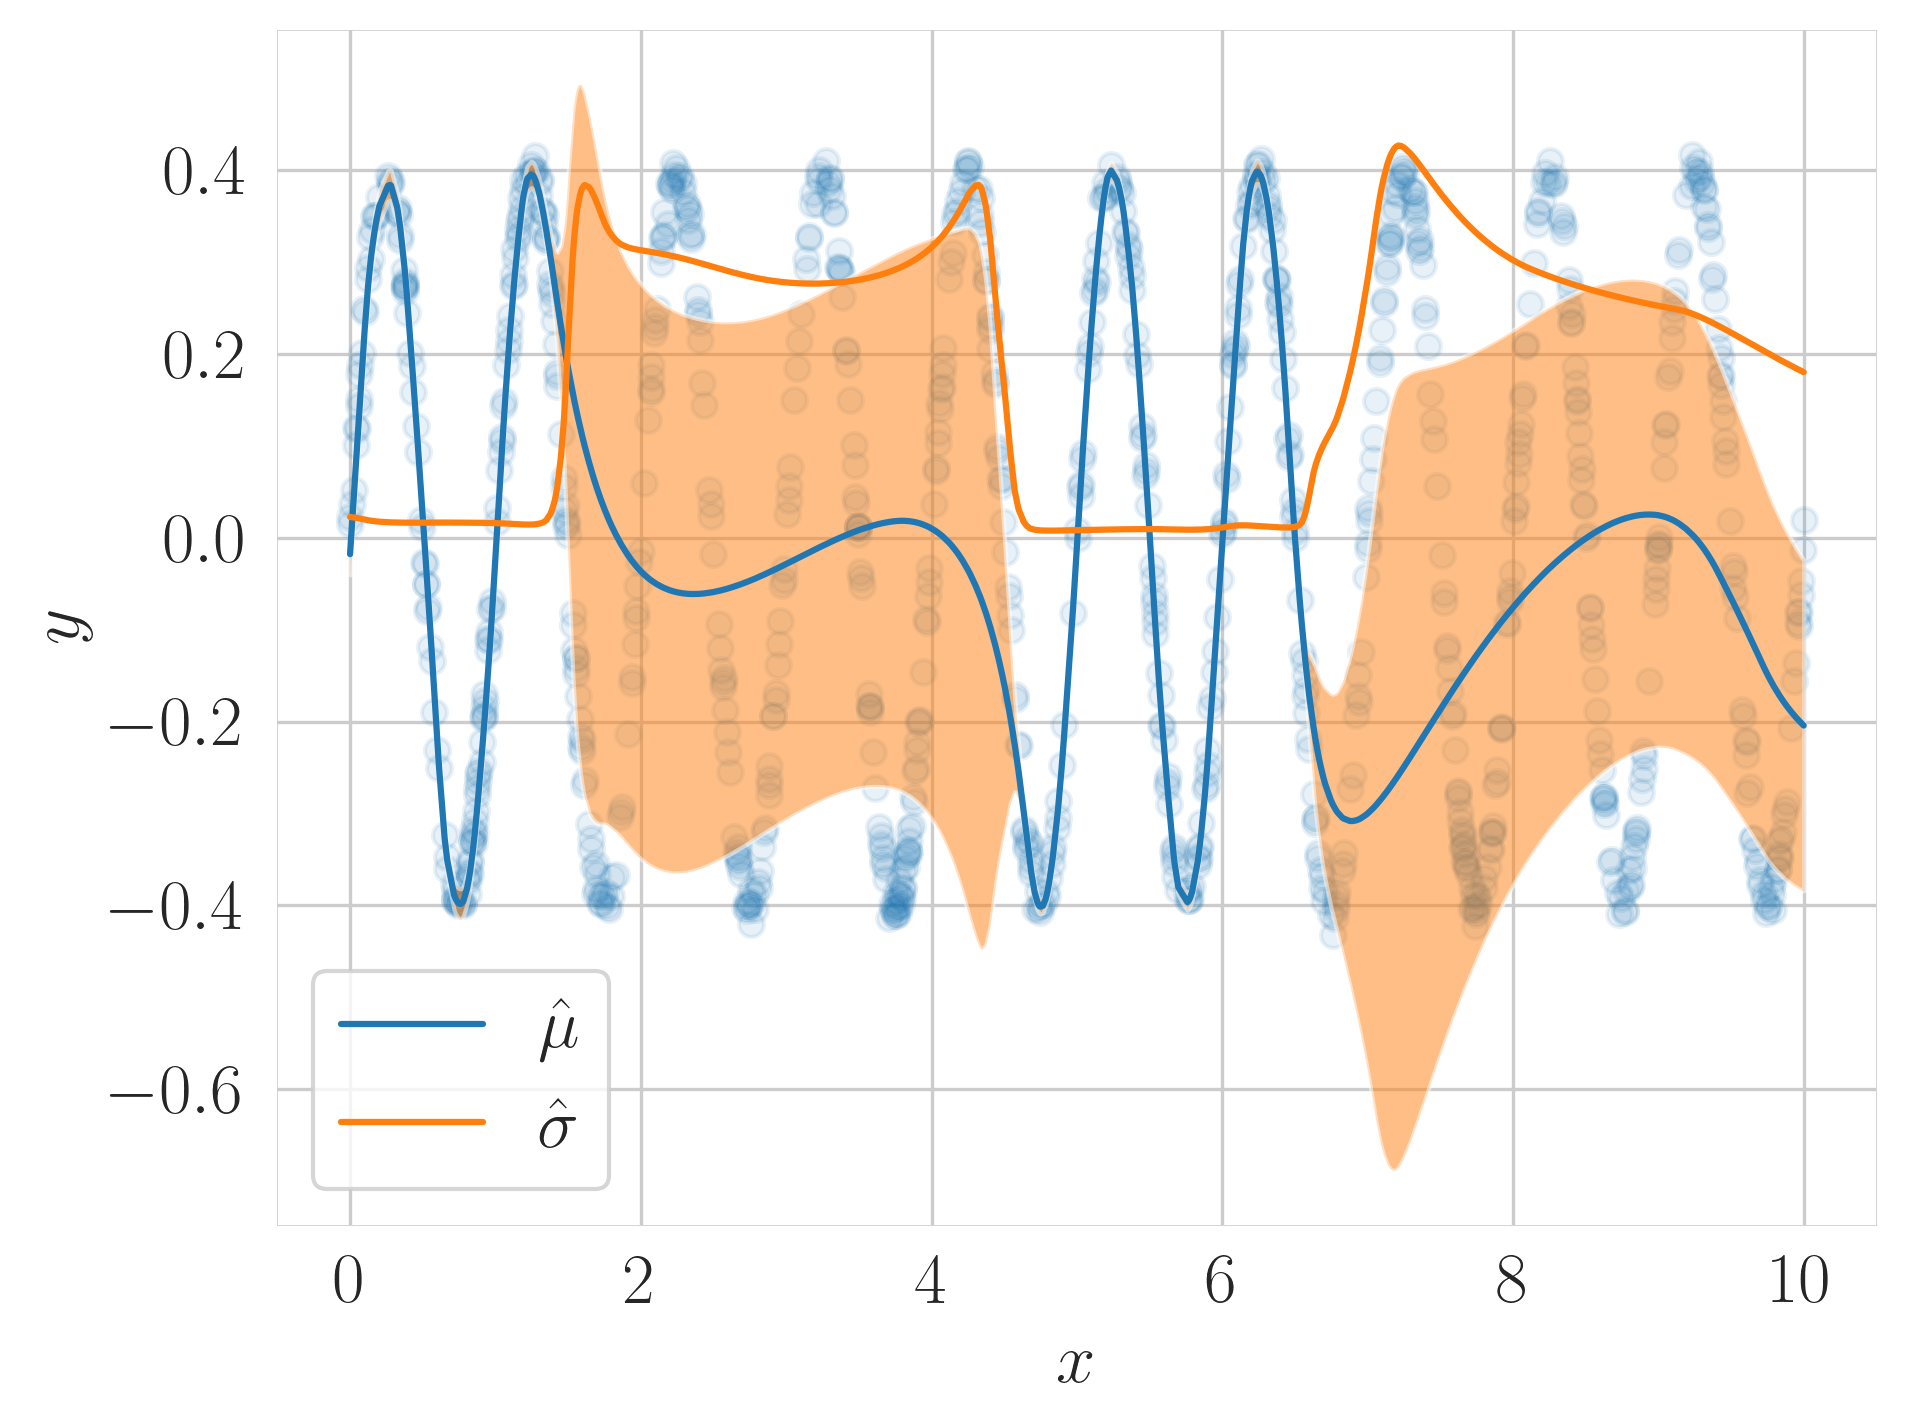

In [24]:
X_sort = np.sort(X)
plt.figure(dpi=300)
plt.scatter(X, Y, alpha=0.1)
means = model_1.f(X_sort)
sigmas = model_1.sigma(X_sort)
plt.fill_between(X_sort, means - sigmas, means + sigmas, alpha=0.5)
plt.plot(X_sort, means, label=r'$\hat{\mu}$')
plt.plot(X_sort, sigmas, label=r'$\hat{\sigma}$')
plt.tight_layout()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

## Using a warm-up

In [10]:
model_2 = MVENetwork(X=X, Y=Y, n_hidden_mean=n_hidden, n_hidden_var=n_hidden, n_epochs=n_epochs, verbose=1, warmup=1, fixed_mean=1, batch_size=1000, reg_mean=0, reg_var=0)

Train on 1000 samples
Epoch 1/4000
1000/1000 [==============================] - 1s 855us/sample - loss: 1.3833
Epoch 2/4000
1000/1000 [==============================] - 0s 7us/sample - loss: 1.3826
Epoch 3/4000
1000/1000 [==============================] - 0s 6us/sample - loss: 1.3821
Epoch 4/4000
1000/1000 [==============================] - 0s 7us/sample - loss: 1.3816
Epoch 5/4000
1000/1000 [==============================] - 0s 7us/sample - loss: 1.3813
Epoch 6/4000
1000/1000 [==============================] - 0s 7us/sample - loss: 1.3811
Epoch 7/4000
1000/1000 [==============================] - 0s 7us/sample - loss: 1.3809
Epoch 8/4000
1000/1000 [==============================] - 0s 7us/sample - loss: 1.3808
Epoch 9/4000
1000/1000 [==============================] - 0s 7us/sample - loss: 1.3807
Epoch 10/4000
1000/1000 [==============================] - 0s 7us/sample - loss: 1.3806
Epoch 11/4000
1000/1000 [==============================] - 0s 6us/sample - loss: 1.3805
Epoch 12/4000
100

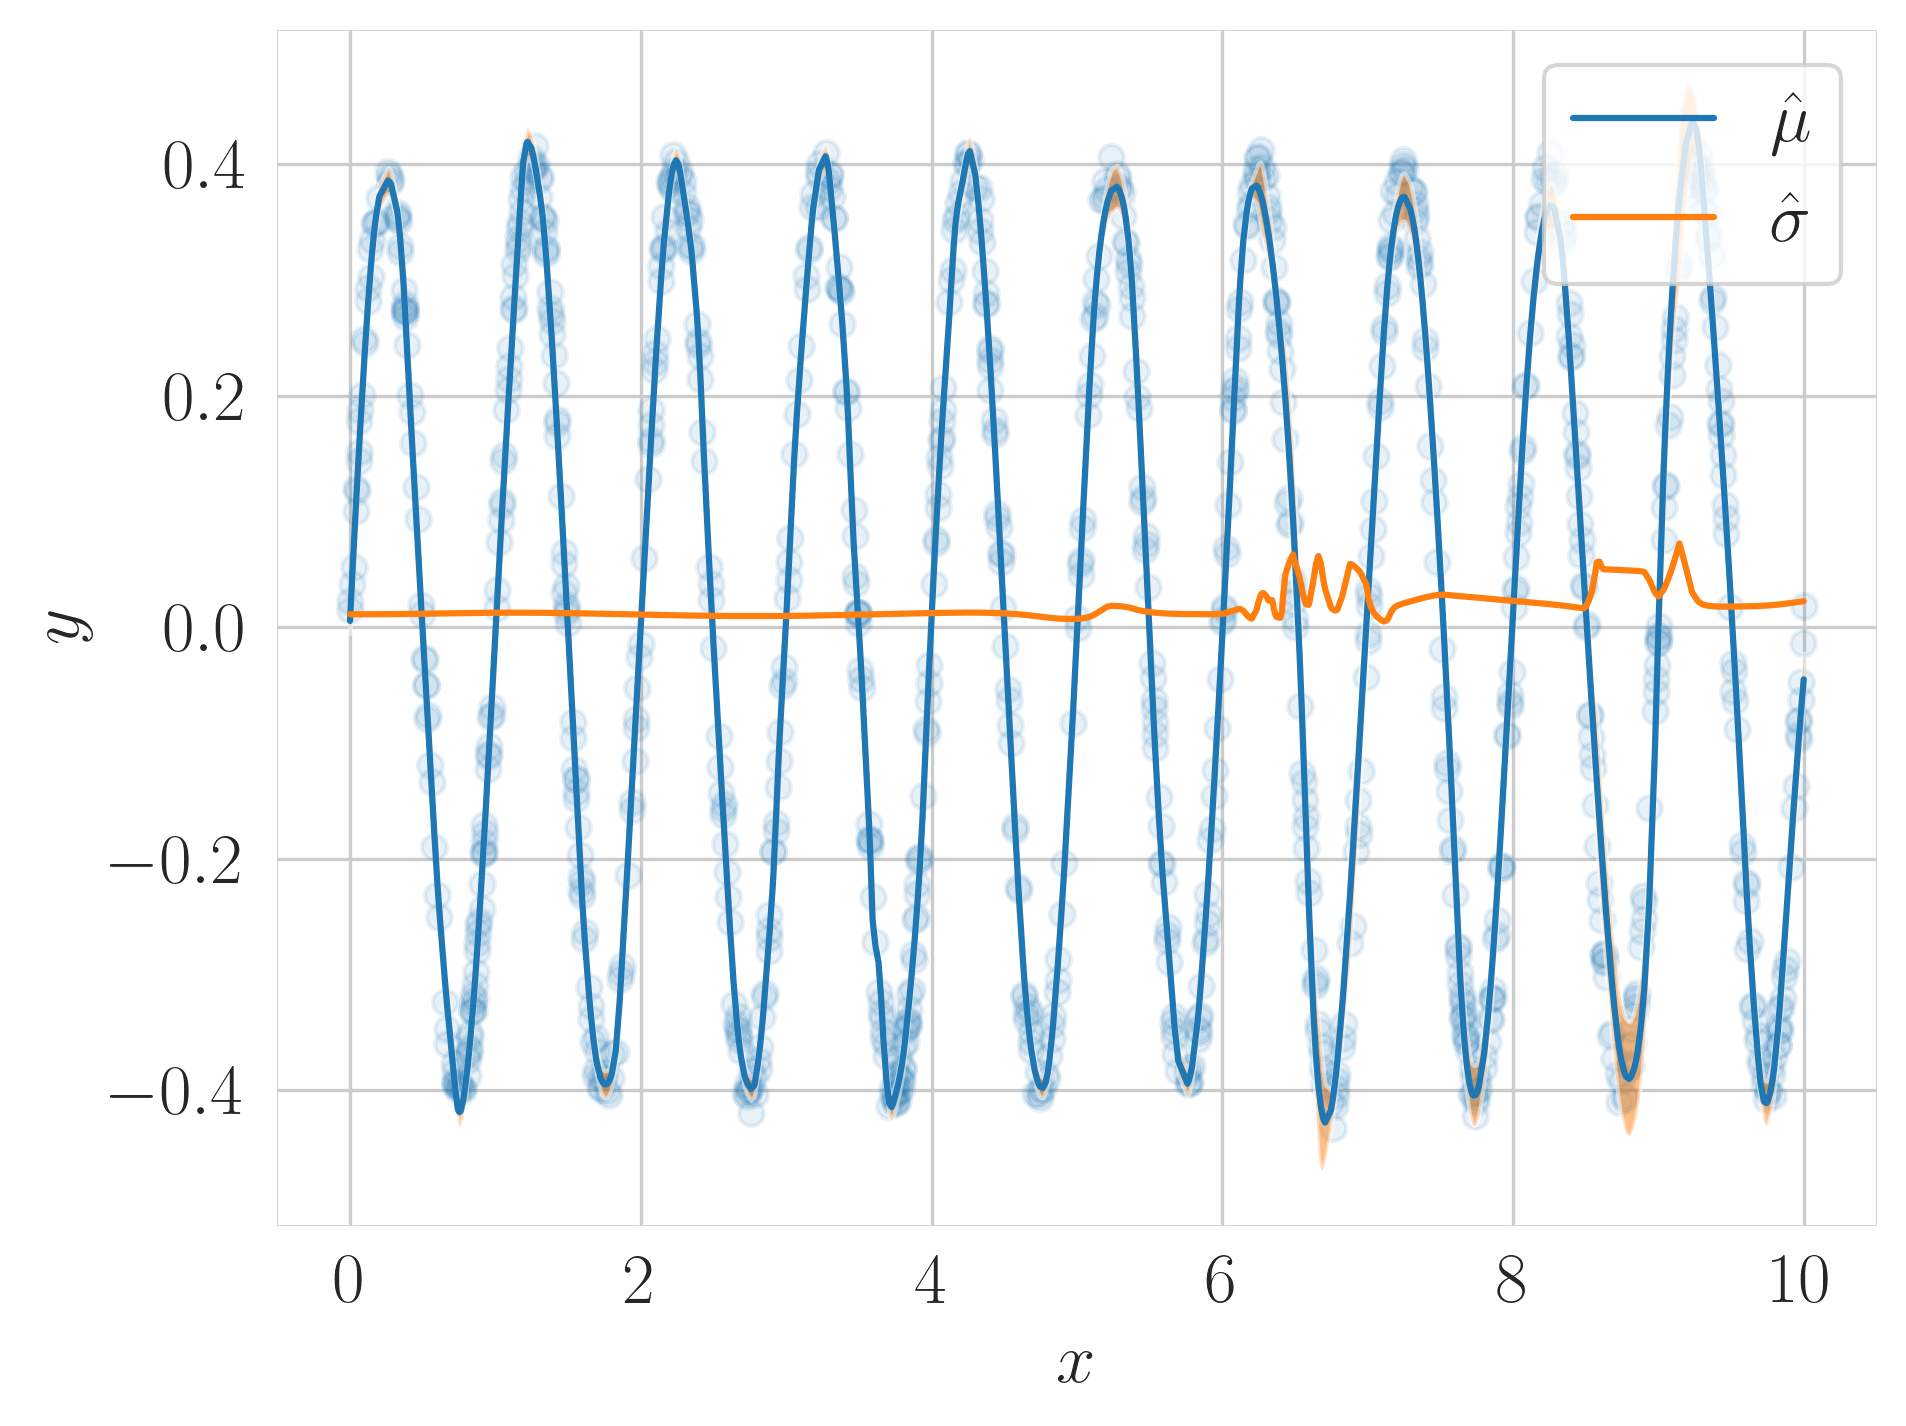

In [20]:
X_sort = np.sort(X)
plt.figure(dpi=300)
plt.scatter(X, Y, alpha=0.1)
means = model_2.f(X_sort)
sigmas = model_2.sigma(X_sort)
plt.fill_between(X_sort, means - sigmas, means + sigmas, alpha=0.5)
plt.plot(X_sort, means, label=r'$\hat{\mu}$')
plt.plot(X_sort, sigmas, label=r'$\hat{\sigma}$')
plt.tight_layout()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

## No warm-up, separate regularization

In [26]:
model_3 = MVENetwork(X=X, Y=Y, n_hidden_mean=n_hidden, n_hidden_var=n_hidden, n_epochs=n_epochs, verbose=1, warmup=0, fixed_mean=1, batch_size=1000, reg_mean=0, reg_var=1)

Train on 1000 samples
Epoch 1/4000
1000/1000 [==============================] - 2s 2ms/sample - loss: 110.7106
Epoch 2/4000
1000/1000 [==============================] - 0s 10us/sample - loss: 109.8764
Epoch 3/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 109.0485
Epoch 4/4000
1000/1000 [==============================] - 0s 10us/sample - loss: 108.2265
Epoch 5/4000
1000/1000 [==============================] - 0s 10us/sample - loss: 107.4098
Epoch 6/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 106.5981
Epoch 7/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 105.7916
Epoch 8/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 104.9904
Epoch 9/4000
1000/1000 [==============================] - 0s 10us/sample - loss: 104.1947
Epoch 10/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 103.4045
Epoch 11/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 10

/Users/laurens/opt/anaconda3/envs/data_noise_variance/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


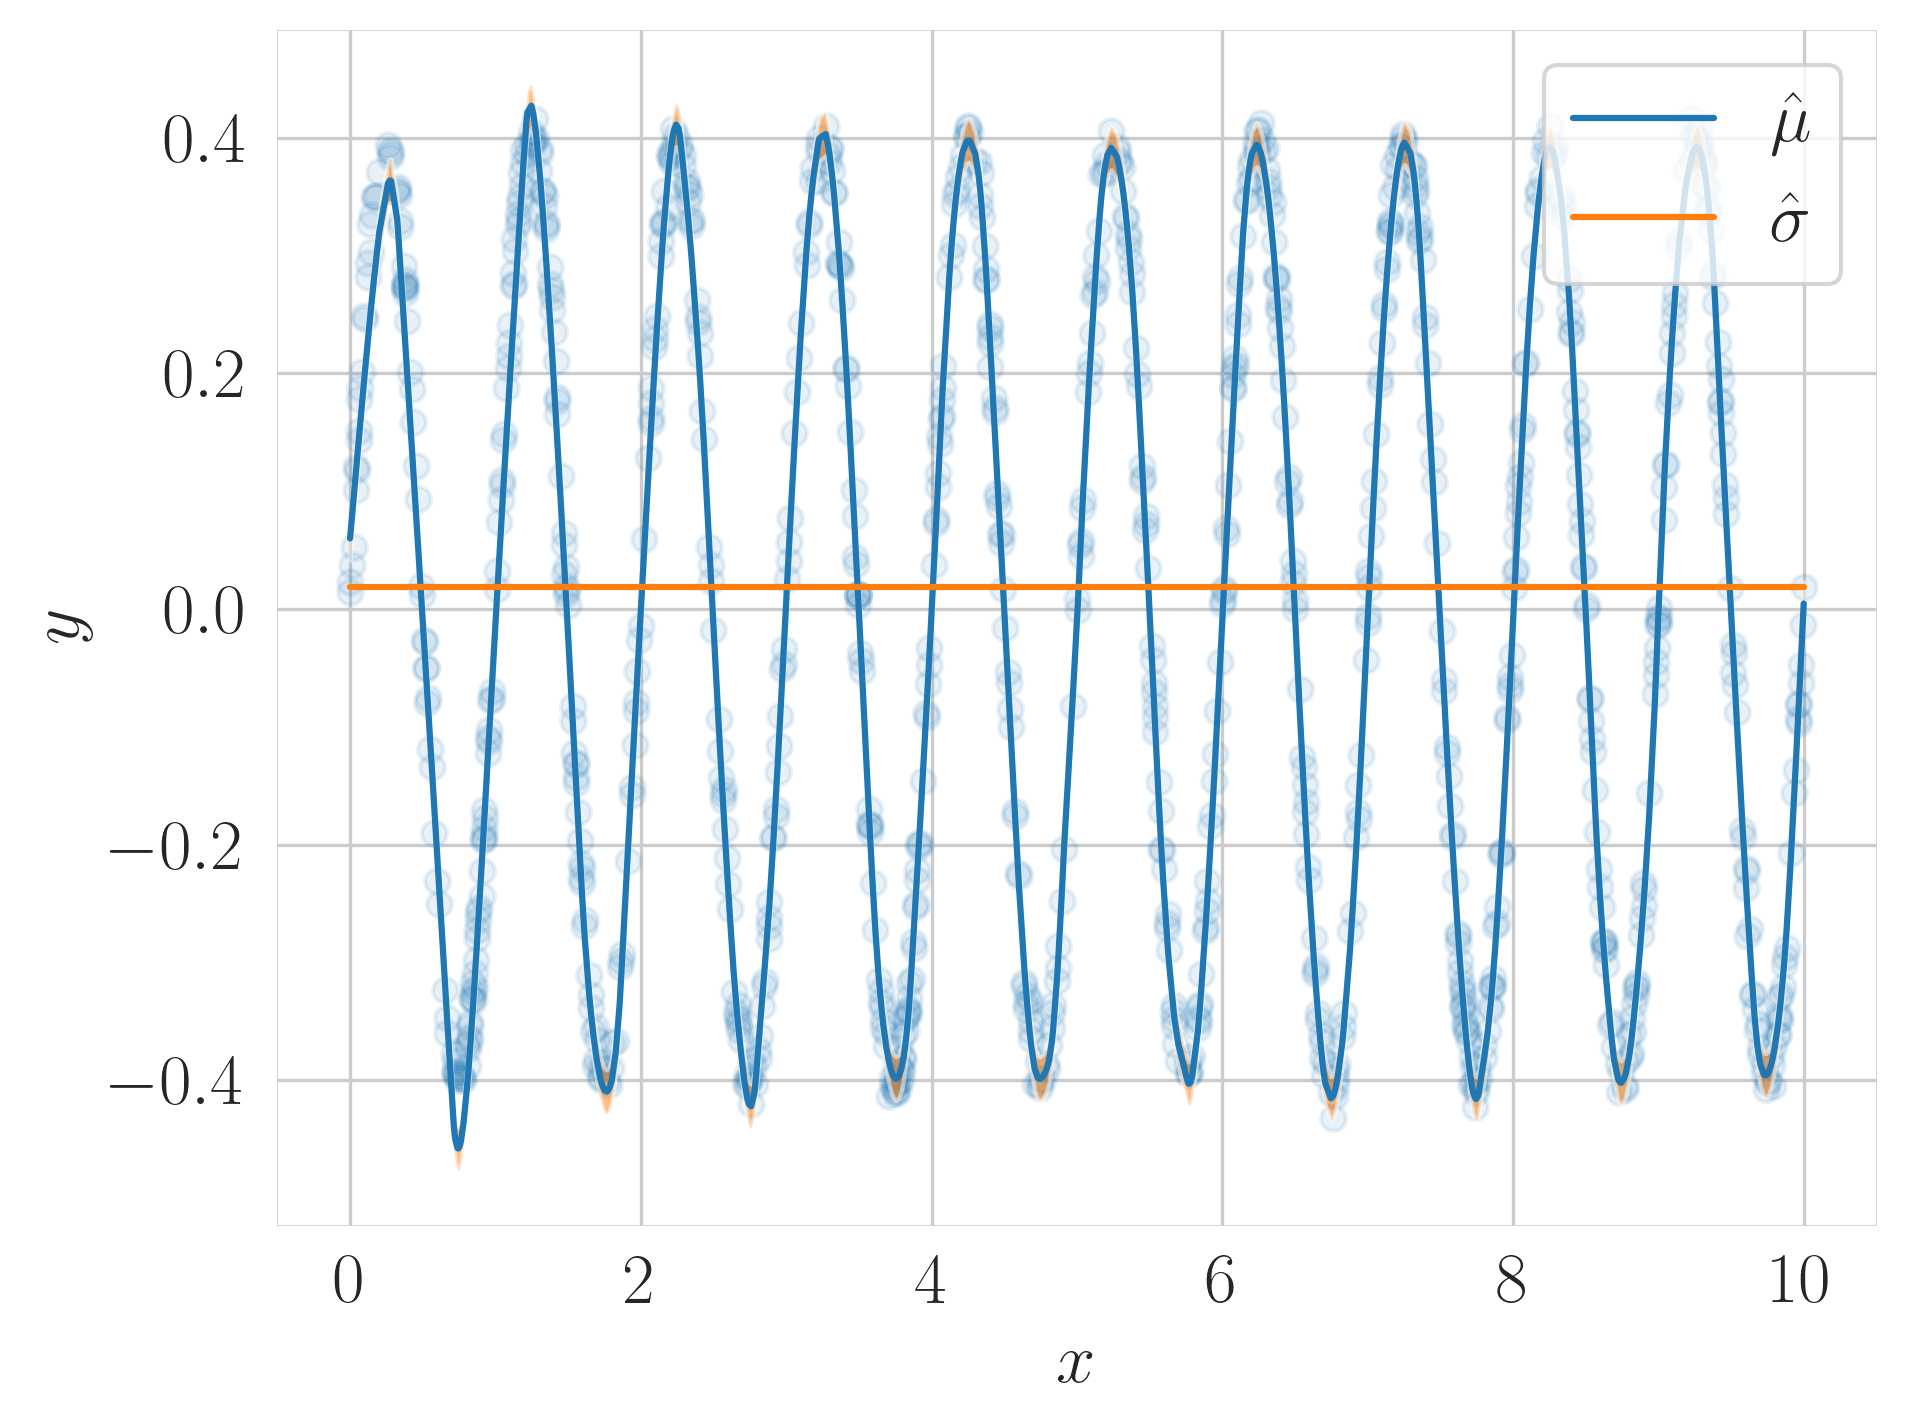

In [27]:
X_sort = np.sort(X)
plt.figure(dpi=300)
plt.scatter(X, Y, alpha=0.1)
means = model_3.f(X_sort)
sigmas = model_3.sigma(X_sort)
plt.fill_between(X_sort, means - sigmas, means + sigmas, alpha=0.5)
plt.plot(X_sort, means, label=r'$\hat{\mu}$')
plt.plot(X_sort, sigmas, label=r'$\hat{\sigma}$')
plt.tight_layout()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()